In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [2]:
data = pd.read_csv('data/train.csv', sep=',')

In [3]:
# нет пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60487 entries, 0 to 60486
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      60487 non-null  int64
 1   time    60487 non-null  int64
 2   x       60487 non-null  int64
 3   y       60487 non-null  int64
dtypes: int64(4)
memory usage: 1.8 MB


In [4]:
import numpy as np

In [11]:
data[(data.id == 1) & (data.y == 1)]


,id,time,x,y,color
353,1,272904,716,1,b
354,1,273620,716,1,b
355,1,274340,720,1,b
356,1,275060,720,1,b
357,1,275776,716,1,b
358,1,276484,708,1,b
359,1,277200,716,1,b
360,1,277924,724,1,b
361,1,278656,732,1,b
362,1,279440,784,1,b


In [6]:
mean = data.loc[data['id'] == 1, 'x'].mean()

In [7]:
data = data[data['x'] < 1.5 * mean]
data = data[data['x'] > 0.5 * mean]

mean = data.loc[data['id'] == 1, 'x'].mean()

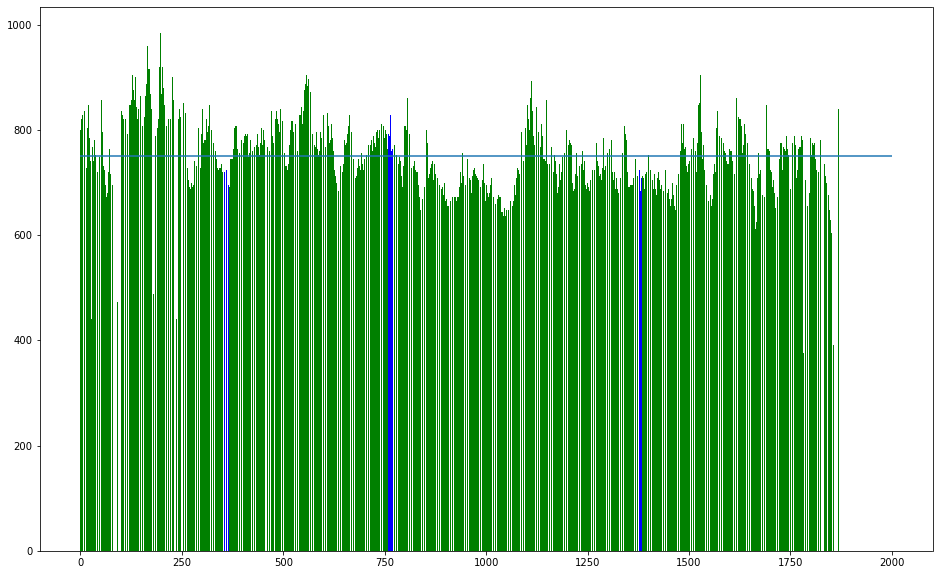

In [10]:
data['color'] = 'g'
data.loc[data['y'] == 1, 'color'] = 'b'
plt.figure(figsize=(16, 10))
plt.hlines(mean, 0, 2000)

plt.bar(data.loc[data['id'] == 1].index, data.loc[data['id'] == 1, 'x'], color=data.loc[data['id'] == 1, 'color'] )
plt.savefig('testfig0.png')

<AxesSubplot:>

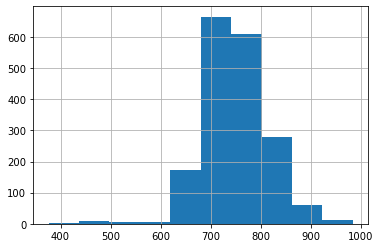

In [8]:
data.loc[data['id'] == 1, 'x'].hist()

In [9]:
data.drop(columns='color', inplace=True)

In [10]:
new_data = pd.DataFrame(columns=['count', 'anomaly'])

In [11]:
STEP = 10000

def_list = []
user1 = data.loc[data.id == 1, ['time']]

anomaly_list = []

for index in user1.loc[user1.time < (user1.time.max() - STEP)].index:

    curr_value = user1.loc[index]
    next_value = curr_value.time + STEP

    nearest = user1.loc[index + 1 :]

    nearest_index = (nearest.time - next_value).abs().sort_values().index[0]
    #print(nearest_index)
    def_list.append(nearest_index - index)

    anomaly = data.loc[index : nearest_index, 'y']

    if 1 in anomaly.values:
        anomaly_list.append(1)
    else:
        anomaly_list.append(0)



In [12]:
new_data['count'] = def_list
new_data['anomaly'] = anomaly_list

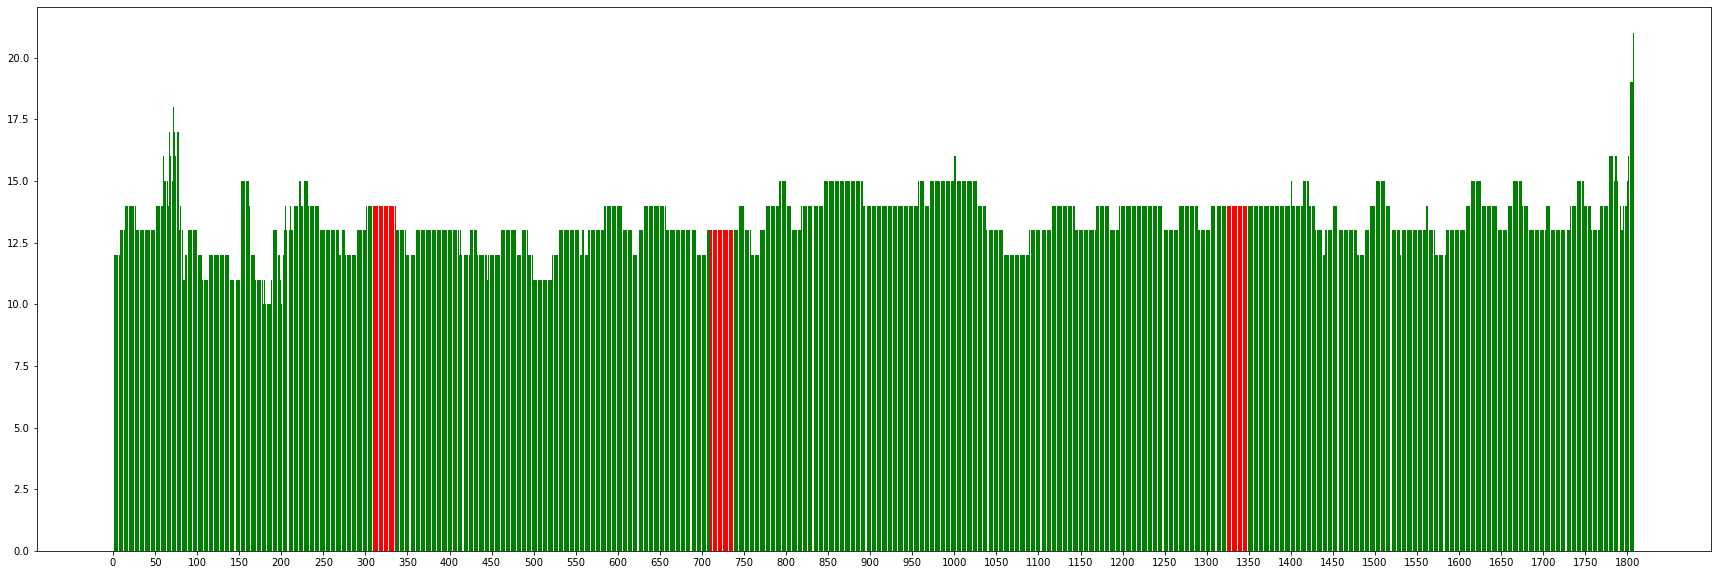

In [13]:
new_data['color'] = 'g'
new_data.loc[new_data['anomaly'] == 1, 'color'] = 'r'

plt.figure(figsize=(30, 10))

plt.bar(new_data.index, new_data['count'].values, color=new_data['color'].values)
plt.xticks([x for x in range(0,new_data.shape[0], 50 )] )
plt.savefig('testfig.png')

In [14]:
new_data

,count,anomaly,color
0,12,0,g
1,12,0,g
2,12,0,g
3,12,0,g
4,12,0,g
...,...,...,...
1804,19,0,g
1805,19,0,g
1806,19,0,g
1807,21,0,g
